# Case Study: Customer characterization on the Marketing Campaign dataset

## Objective

The objective of this study is to segment customers in a marketing campaign dataset into meaningful groups based on their demographics, spending habits, and purchase behavior.  
By exploring different clustering methods (K-Means, Hierarchical, and DBSCAN), the aim is to uncover hidden patterns that can guide targeted marketing strategies, improve customer engagement, and optimize business decisions.

## Dataset Overview

The dataset used in this case study is the **Marketing Campaign dataset**, which contains demographic, lifestyle, and purchasing information of customers, along with their responses to previous marketing campaigns.  

It has the following columns:  

- **ID:** Unique identifier assigned to each customer.  
- **Year_Birth:** Year of birth of the customer.  
- **Education:** Level of education of the customer.  
- **Marital_Status:** Marital status of the customer.  
- **Income:** Annual household income of the customer.  
- **Kidhome:** Number of small children in the household.  
- **Teenhome:** Number of teenagers in the household.  
- **Dt_Customer:** Date when the customer enrolled with the company.  
- **Recency:** Number of days since the customer’s last purchase.  
- **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds:** Amount spent by the customer on different product categories in the last two years.  
- **NumDealsPurchases:** Number of purchases made using a discount.  
- **NumWebPurchases:** Number of purchases made through the company’s website.  
- **NumCatalogPurchases:** Number of purchases made using a catalog.  
- **NumStorePurchases:** Number of purchases made directly in stores.  
- **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  
- **AcceptedCmp1 – AcceptedCmp5:** Whether the customer accepted offers in previous marketing campaigns.  
- **Response:** Whether the customer accepted the offer in the last marketing campaign.  
- **Complain:** Whether the customer has complained in the last 2 years.  
- **Z_CostContact:** Constant cost associated with each marketing contact.  
- **Z_Revenue:** Constant revenue associated with each sale.  


## Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.shape

(2240, 29)

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Check duplicate values
df.duplicated().astype('int').sum()

np.int64(0)

In [5]:
df.drop("ID", axis=1).duplicated().astype('int').sum()

np.int64(182)

This suggests that all IDs are unique. Some values might be duplicated i.e np.int64(182) but rows are unique because IDs are unique.

In [6]:
# Check missing values
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Income has some missing values.

## Preprocessing and Feature Engineering

In [7]:
# Impute missing values
df['Income'] = df['Income'].fillna(df['Income'].median())

In [8]:
# Categorize columns
binary_columns = [col for col in df.columns if df[col].nunique()==2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numeric_columns = [ col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns + categorical_columns]
binary_columns

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [9]:
categorical_columns

['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

In [10]:
numeric_columns

['ID',
 'Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue']

In [11]:
# Find numeric columns with only one unique value
constant_cols = [col for col in numeric_columns if df[col].nunique() == 1]
constant_cols

['Z_CostContact', 'Z_Revenue']

In [12]:
df.shape

(2240, 29)

In [13]:
# Remove unnecessary columns
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)
df.shape

(2240, 26)

In [14]:
df2 = df.copy()

In [15]:
categorical_columns

['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

In [16]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
# Standardize Education into two broader categories
df['Education'] = df['Education'].replace(['PhD', 'Master'],'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle','Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')
df['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [18]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
# Standardize Marital status into two broader categories
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Married'],'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'].unique()

array(['Single', 'Partner'], dtype=object)

In [20]:
df['Kidhome'].unique()

array([0, 1, 2])

In [21]:
df['Teenhome'].unique()

array([0, 1, 2])

In [22]:
# Combining columns together to reduce the number of dimensions
df['Kids'] = df['Kidhome'] + df['Teenhome']
df.shape

(2240, 27)

In [23]:
numeric_columns

['ID',
 'Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue']

In [24]:
# Combining Amount expenses columns together to reduce the number of dimensions
df['Expenses'] = df['MntWines'] + df['MntFruits']  + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.shape

(2240, 28)

In [25]:
# Combining Purchase columns together to reduce the number of dimensions
df['Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases']  + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.shape

(2240, 29)

In [26]:
binary_columns

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [27]:
# Combining Accepted columns together to reduce the number of dimensions
df['TotalAcceptedCmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']
df.shape

(2240, 30)

In [28]:
# Calculate 'Days_as_client' before selecting columns
# Convert the Dt_Customer column from a string/object type to a proper datetime object in Pandas

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
latest_date = df['Dt_Customer'].max()
df['Days_as_client'] = (latest_date - df['Dt_Customer']).dt.days
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,Purchases,TotalAcceptedCmp,Days_as_client
0,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,0,1617,25,0,663
1,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,2,27,6,0,113


In [29]:
# Select only the feature engineered columns

# df = df.drop([
#     'Kidhome','Teenhome',
#     'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
#     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases',
#     'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
#     'Dt_Customer'
#     ], axis=1)

df = df[[
          'Education','Marital_Status','Kids',
          'Income','Recency','Expenses','Purchases',
          'TotalAcceptedCmp','Complain','Response',
          'Days_as_client'
          ]]
df

,Education,Marital_Status,Kids,Income,Recency,Expenses,Purchases,TotalAcceptedCmp,Complain,Response,Days_as_client
0,Graduate,Single,0,58138.0,58,1617,25,0,0,1,663
1,Graduate,Single,2,46344.0,38,27,6,0,0,0,113
2,Graduate,Partner,0,71613.0,26,776,21,0,0,0,312
3,Graduate,Partner,1,26646.0,26,53,8,0,0,0,139
4,Postgraduate,Partner,1,58293.0,94,422,19,0,0,0,161
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Partner,1,61223.0,46,1341,18,0,0,0,381
2236,Postgraduate,Partner,3,64014.0,56,444,22,1,0,0,19
2237,Graduate,Single,0,56981.0,91,1241,19,1,0,0,155
2238,Postgraduate,Partner,1,69245.0,8,843,23,0,0,0,156


## Further EDA

In [30]:
# Re-Categorizing columns because columns have been removed during feature engineering
binary_columns = [col for col in df.columns if df[col].nunique()==2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numeric_columns = [ col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns + categorical_columns]

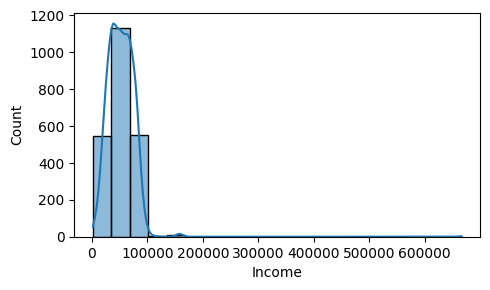

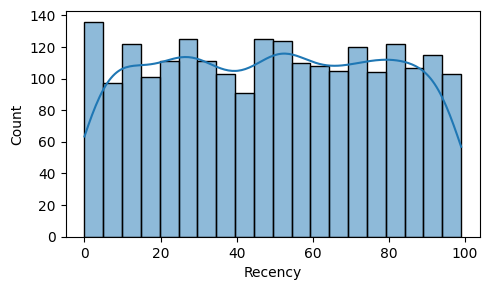

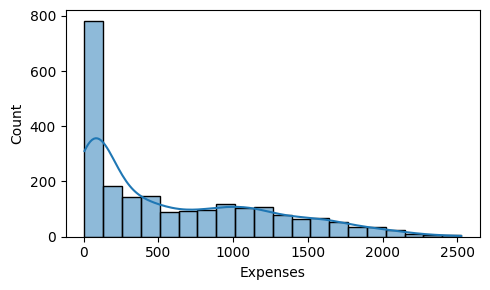

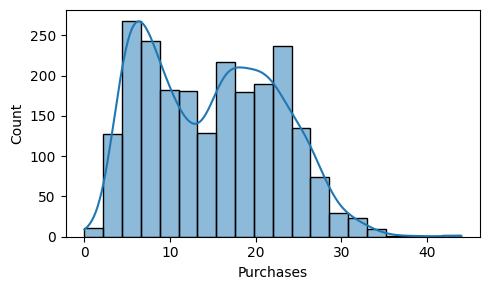

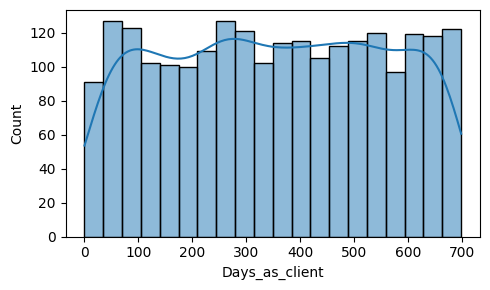

In [31]:
# Plot histograms for numeric columns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for column in numeric_columns:
  plt.figure(figsize=(5,3))
  sns.histplot(data=df, x=column, kde= True, bins=20)
  plt.tight_layout()
  plt.show()

- Some outliers are present in Income column
- Distribution of Recency and Days_as_client is uniform.
- Skewness in the Expenses column with outliers

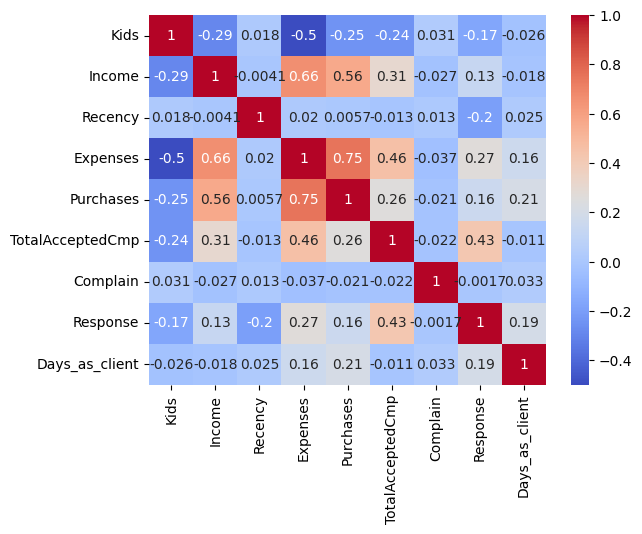

In [32]:
# Check correlation
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

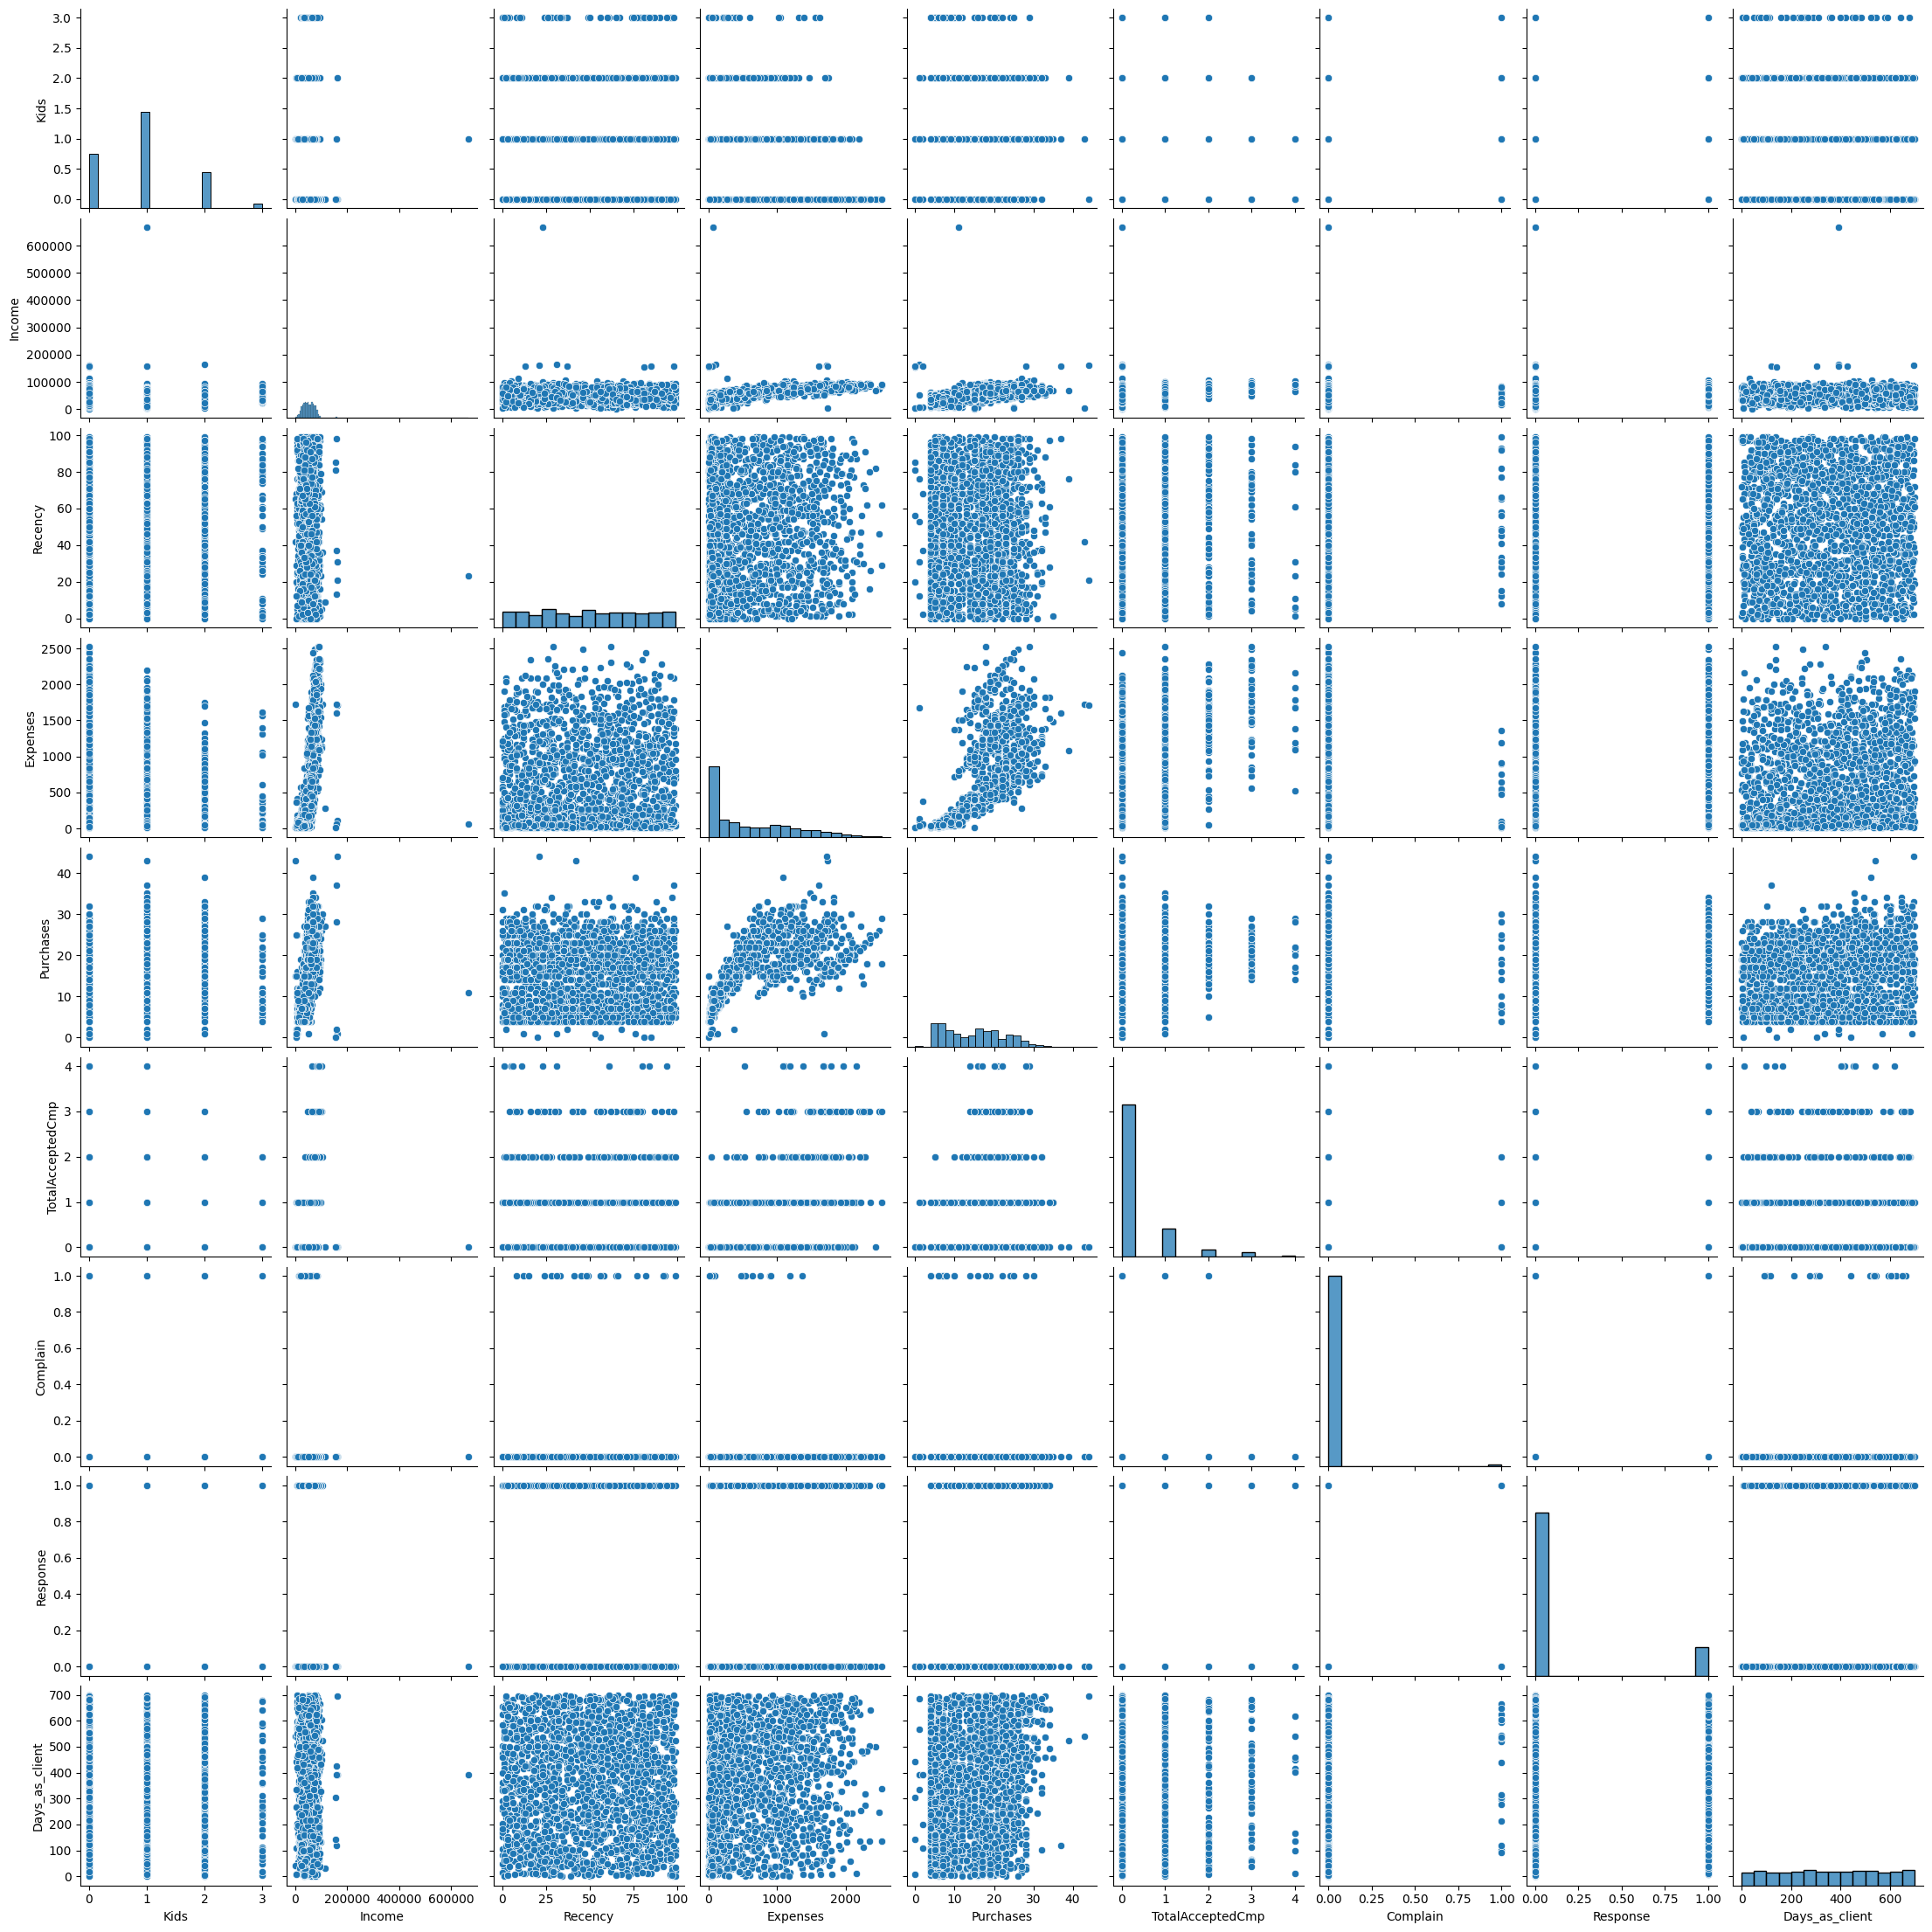

In [33]:
# Check correlation with pairplot
sns.pairplot(df)
plt.show()

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

In [35]:
# Label encoding for Marital status
from sklearn.preprocessing import LabelEncoder

le_marital = LabelEncoder()

df['Marital_Status_Encoded'] = le_marital.fit_transform(df['Marital_Status'])


In [36]:
# Label encoding for ordinal column Education

education_mapping = {
    'Undergraduate': 0,
    'Graduate': 1,
    'Postgraduate': 2
}

df['Education_encoded'] = df['Education'].map(education_mapping)
df['Education_encoded'].value_counts()


,count
Education_encoded,
1,1330
2,856
0,54


In [37]:
df = df.drop(['Marital_Status','Education'],axis=1)

In [38]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)        # 25th percentile (first quartile)
        Q3 = df[col].quantile(0.75)        # 75th percentile (third quartile)
        IQR = Q3 - Q1                      # Interquartile Range (spread of the middle 50%)

        lower_bound = Q1 - 1.5 * IQR       # Anything below this - an outlier
        upper_bound = Q3 + 1.5 * IQR       # Anything above this - an outlier

        # Keep only those values that are within the range
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [39]:
numerical_cols = df.select_dtypes(include=np.number).columns
df = remove_outliers_iqr(df, numerical_cols)

In [40]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,Kids,Income,Recency,Expenses,Purchases,TotalAcceptedCmp,Complain,Response,Days_as_client,Marital_Status_Encoded,Education_encoded
0,1.525907,-0.088161,-0.447384,-0.888352,-1.031077,0.0,0.0,0.0,-1.159445,1.403397,-0.631332
1,-1.502596,1.235683,-0.868160,0.630077,0.961299,0.0,0.0,0.0,-0.153648,-0.712557,-0.631332
2,0.011656,-1.120140,-0.868160,-0.835643,-0.765427,0.0,0.0,0.0,-1.028034,-0.712557,-0.631332
3,0.011656,0.537848,1.516239,-0.087579,0.695649,0.0,0.0,0.0,-0.916841,-0.712557,1.247001
4,0.011656,0.758934,-1.218807,0.508440,1.094124,0.0,0.0,0.0,-0.249678,-0.712557,1.247001
...,...,...,...,...,...,...,...,...,...,...,...
1554,-1.502596,-0.168946,0.709751,1.183523,1.758249,0.0,0.0,0.0,1.691157,1.403397,1.247001
1555,-1.502596,-1.111234,-0.026608,-0.898488,-1.296727,0.0,0.0,0.0,1.711374,1.403397,-0.631332
1556,0.011656,-0.712807,1.060398,-0.882270,-1.296727,0.0,0.0,0.0,0.104120,-0.712557,-0.631332
1557,0.011656,0.691351,-0.166867,1.775487,0.562824,0.0,0.0,0.0,0.195096,-0.712557,-0.631332


## Finding number of clusters with elbow method

In [41]:
# Optimal K value with Elbow Method

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

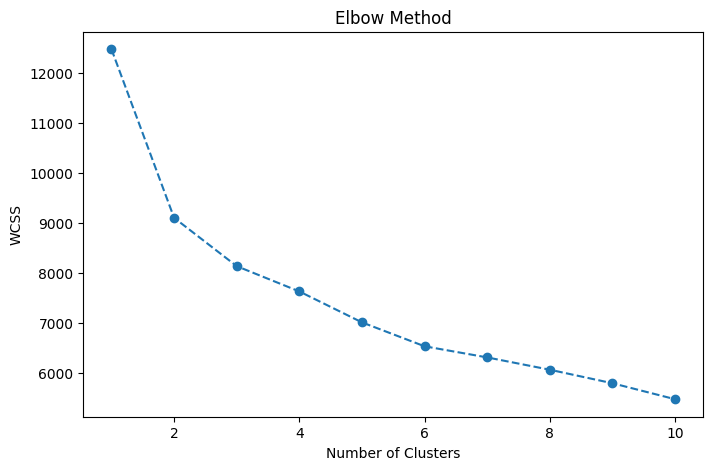

In [42]:
# Plot the sum of squared distance to determine optimal number of clusters (Elbow method)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- From the graph it is clear that the k value should be approx 2.
- Let's evaluate further for both 2 and 3.

## Silhouette Score for KMeans, Agglomerative Hierarchical clustering and DBSCAN

In [43]:
# Silhouette Score for KMeans, Agglomerative Hierarchical clustering and DBSCAN with k = 3

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_df)
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_df)

# Calculate Silhouette Score for DBSCAN only if there is more than one cluster
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN: Only one cluster found, cannot calculate silhouette score.")

KMeans Silhouette Score: 0.1874219157975422
Hierarchical Clustering Silhouette Score: 0.1607902785847162
DBSCAN Silhouette Score: -0.361335643785213


In [44]:
# Silhouette Score for KMeans, Agglomerative Hierarchical clustering and DBSCAN with k = 2

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(scaled_df)
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_df)

# Calculate Silhouette Score for DBSCAN only if there is more than one cluster
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN: Only one cluster found, cannot calculate silhouette score.")

KMeans Silhouette Score: 0.2486494930446867
Hierarchical Clustering Silhouette Score: 0.22283684939547618
DBSCAN Silhouette Score: -0.361335643785213


Sihoute score with k value 2 is better but not that drastically improved.

## Using Fine tuned Cluster Algorithms

In [47]:
# Using Fine-Tuned Cluster Algorithms with different hyperparameters
import random
import numpy as np

# Set seed for reproducibility
SEED = random.randint(1, 1000)

# Fine-tuning Clustering Algorithms
def fine_tune_kmeans(scaled_df):
    """Fine-tunes KMeans clustering."""
    best_score = -1
    best_kmeans = None
    for n_clusters in range(3, 6):  # Try different numbers of clusters
        for init in ['k-means++', 'random']:  # Try different initialization methods
            for max_iter in [300, 500]:  # Try different maximum iterations
                # max_iter means max number of iterations K-means will run to adjust centroids before stopping.
                # If centroids converge earlier, it stops sooner.
                kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=SEED)
                kmeans_labels = kmeans.fit_predict(scaled_df)
                silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_kmeans = kmeans
    return best_kmeans

def fine_tune_dbscan(scaled_df):
    """Fine-tunes DBSCAN clustering."""
    best_score = -1
    best_dbscan = None
    for eps in np.linspace(0.5, 5, 10):  # Try different epsilon values
        for min_samples in range(5, 15):  # Try different minimum samples
            # min_samples is the minimum number of points required within an eps-radius neighbourhood for a point to be considered a core point
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(scaled_df)
            if len(set(dbscan_labels)) > 1:  # Ensure more than one cluster is found
                silhouette_avg = silhouette_score(scaled_df, dbscan_labels)
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_dbscan = dbscan
    return best_dbscan

def fine_tune_hierarchical(scaled_df):
    """Fine-tunes Hierarchical clustering."""
    best_score = -1
    best_agg = None
    for n_clusters in range(3, 6):
        for linkage in ['ward', 'complete', 'average']:  # Try different linkage methods
            agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            agg_labels = agg.fit_predict(scaled_df)
            silhouette_avg = silhouette_score(scaled_df, agg_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_agg = agg
    return best_agg


# Fine-tune the clustering algorithms
best_kmeans = fine_tune_kmeans(scaled_df)
best_dbscan = fine_tune_dbscan(scaled_df)
best_agg = fine_tune_hierarchical(scaled_df)

# Use the best models for clustering
kmeans_labels = best_kmeans.fit_predict(scaled_df)
dbscan_labels = best_dbscan.fit_predict(scaled_df)
agg_labels = best_agg.fit_predict(scaled_df)

# Evaluate and analyze the results of the fine-tuned models
print("KMeans Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))
print("DBSCAN Silhouette Score:", silhouette_score(scaled_df, dbscan_labels))
print("Hierarchical Silhouette Score:", silhouette_score(scaled_df, agg_labels))

KMeans Silhouette Score: 0.19479688025159242
DBSCAN Silhouette Score: 0.1499552400566017
Hierarchical Silhouette Score: 0.18413369524219017


Among the three, KMeans performed slightly better (0.19), but overall all the scores are low.

## Cluster characterization

In [49]:
# Cluster Characterization (Fine-Tuned Models)
# Compare customer groups for each clustering method
# Analyze and compare clusters from fine-tuned models

def characterize_clusters_tuned(labels, method_name, scaled_df):
    # Add the cluster labels to the original DataFrame under a new column
    df[f'{method_name}_Cluster'] = labels

    # Keep only numeric columns for the mean calculation
    numeric_cols = df.select_dtypes(include=np.number).columns

    # Calculate mean values of numeric features
    cluster_profile = df.groupby(f'{method_name}_Cluster')[numeric_cols].mean()

    print(f"\n{method_name.capitalize()} Cluster Profiles:")
    print(cluster_profile[['Income', 'Expenses','Purchases']])

    return cluster_profile

# Run cluster characterization for each fine-tuned model
characterize_clusters_tuned(kmeans_labels, 'kmeans_tuned', scaled_df)
characterize_clusters_tuned(dbscan_labels, 'dbscan_tuned', scaled_df)
characterize_clusters_tuned(agg_labels, 'hierarchical_tuned', scaled_df)


Kmeans_tuned Cluster Profiles:
                            Income     Expenses  Purchases
kmeans_tuned_Cluster                                      
0                     37371.982558   150.343023   9.421512
1                     36807.023077   138.427692   9.101538
2                     67421.630088  1032.833628  21.768142

Dbscan_tuned Cluster Profiles:
                            Income    Expenses  Purchases
dbscan_tuned_Cluster                                     
-1                    43095.875000  716.375000  19.625000
 0                    47898.591346  469.382692  13.586538
 1                    48129.693016  461.141610  13.806014

Hierarchical_tuned Cluster Profiles:
                                   Income    Expenses  Purchases
hierarchical_tuned_Cluster                                      
0                            64656.924471  934.441088  20.936556
1                            35698.308380  118.384358   8.429050
2                             7144.000000  416.000000

,Kids,Income,Recency,Expenses,Purchases,TotalAcceptedCmp,Complain,Response,Days_as_client,Marital_Status_Encoded,Education_encoded,kmeans_tuned_Cluster,dbscan_tuned_Cluster,hierarchical_tuned_Cluster
hierarchical_tuned_Cluster,,,,,,,,,,,,,,
0,0.774924,64656.924471,51.747734,934.441088,20.936556,0.0,0.0,0.0,384.546828,0.306647,1.413897,1.797583,0.690332,0.0
1,1.153073,35698.308380,50.027933,118.384358,8.429050,0.0,0.0,0.0,311.726257,0.357542,1.277095,0.656983,0.634637,1.0
2,2.000000,7144.000000,92.000000,416.000000,25.000000,0.0,0.0,0.0,204.000000,1.000000,2.000000,0.000000,-1.000000,2.0
3,0.000000,113734.000000,9.000000,277.000000,27.000000,0.0,0.0,0.0,32.000000,1.000000,2.000000,2.000000,-1.000000,3.0


- In Kmeans_tuned Cluster Profiles, the first two clusters have almost the same mean values. They could have belong to same cluster.
- In DBSCAN, the first row is labelled as -1, representing noise.The values indicate majority of the data is noise/outliers. But it is unable to distinguish between the last two rows so dbscan is unable to find pattern or clusters but is good at finding outliers.
- DBSCAN was good at finding outliers but not clustering.
- Hierarchical values are able to distinguish clusters. It was able to uncover diverse behaviour.

## TSNE for Fine-Tuned Models and Visualize

Reduce the dimensions into lesser components and visualize to see which one gives a better interpretation.

In [50]:
# Reduces the high-dimensional scaled dataset into 2 dimensions using t-SNE

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'scaled_df' contains your scaled data
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=SEED)
tsne_results = tsne.fit_transform(scaled_df)
tsne_results

array([[ 23.478922 , -39.981567 ],
       [ -6.2761803,  -2.1875653],
       [-50.37655  ,  -8.457947 ],
       ...,
       [-38.9488   ,  -3.820245 ],
       [-16.538076 ,   7.070491 ],
       [ 12.678981 ,  23.679022 ]], dtype=float32)

In [52]:
# Create a new DataFrame with the t-SNE results and cluster labels
tsne_df = pd.DataFrame({
    'tsne_1': tsne_results[:, 0], 'tsne_2': tsne_results[:, 1],
    'kmeans_cluster': kmeans_labels, 'dbscan_cluster': dbscan_labels, 'hierarchical_cluster': agg_labels
    })
tsne_df

,tsne_1,tsne_2,kmeans_cluster,dbscan_cluster,hierarchical_cluster
0,23.478922,-39.981567,0,0,1
1,-6.276180,-2.187565,2,1,0
2,-50.376549,-8.457947,1,1,1
3,8.560998,33.050823,2,1,0
4,12.198461,22.411596,2,1,0
...,...,...,...,...,...
1554,26.370337,-3.876329,2,0,0
1555,-1.538391,-39.186523,0,0,1
1556,-38.948799,-3.820245,1,1,1
1557,-16.538076,7.070491,2,1,0


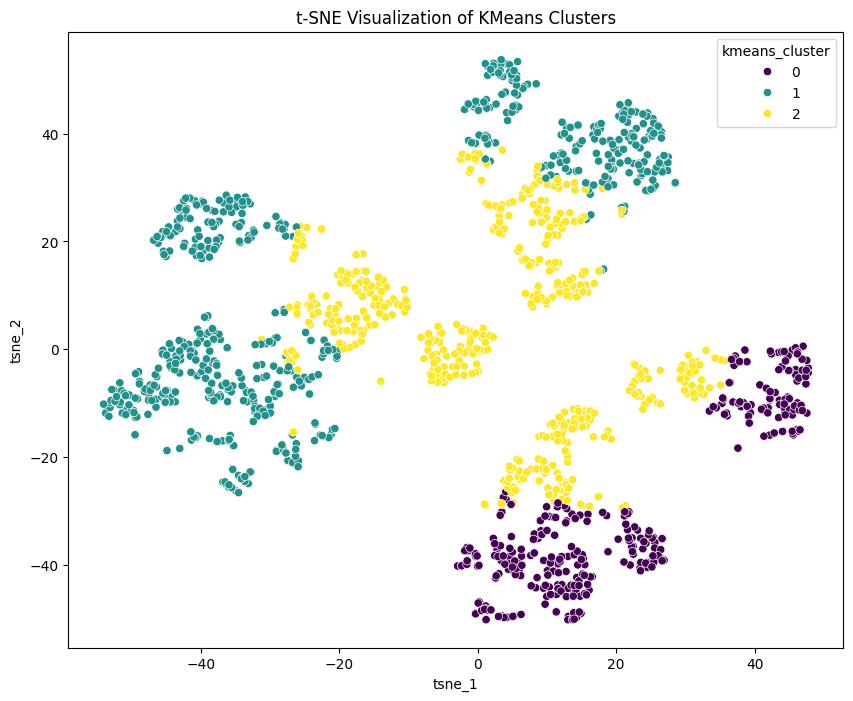

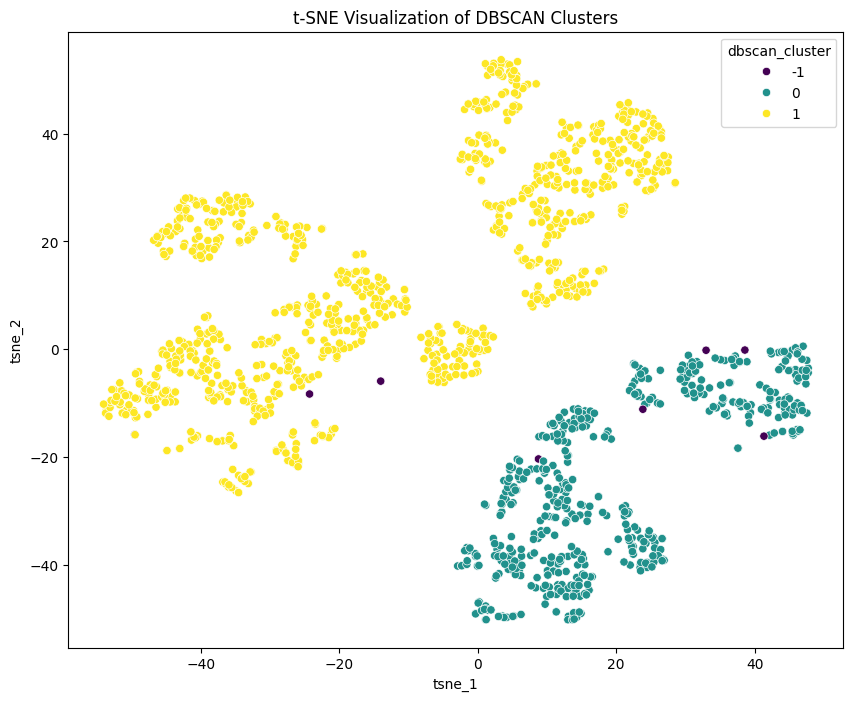

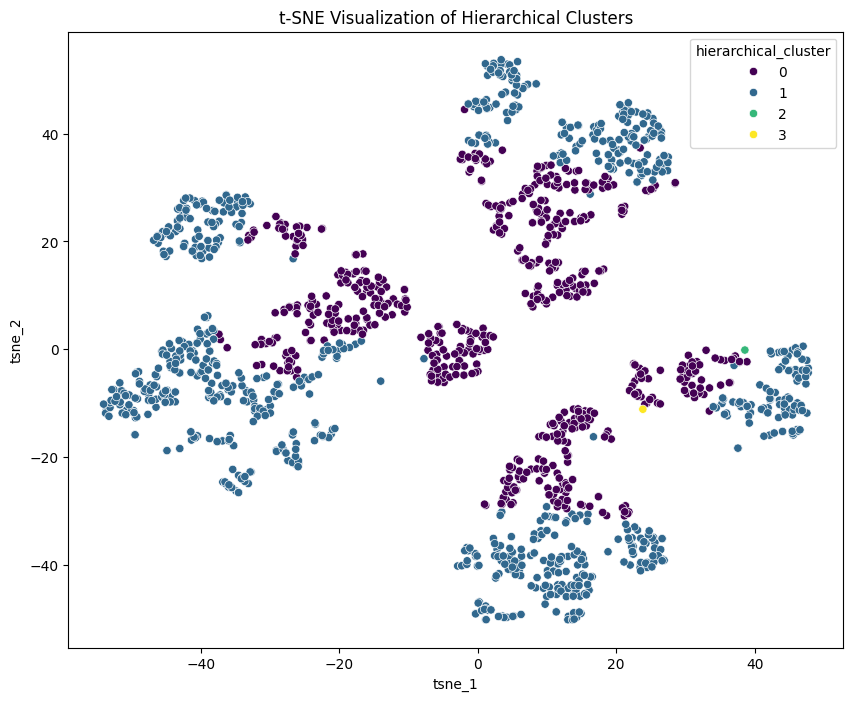

In [53]:
# Visualize the clusters in the t-SNE reduced space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='kmeans_cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of KMeans Clusters')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='dbscan_cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='hierarchical_cluster', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Hierarchical Clusters')
plt.show()

- DBSCAN is giving better clustering by looking at the graph, lets also check with 3D visualization

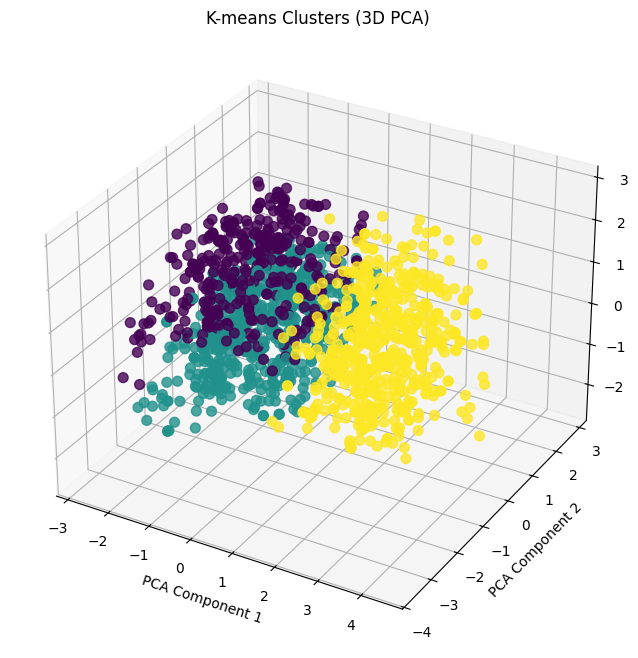

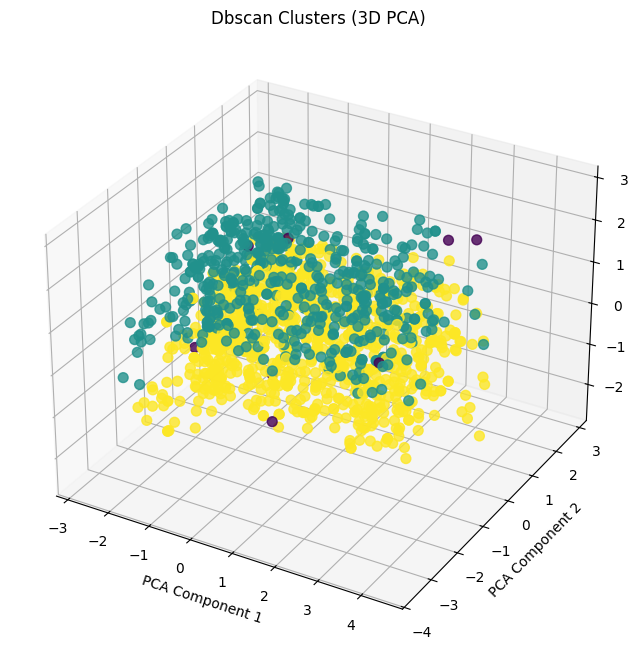

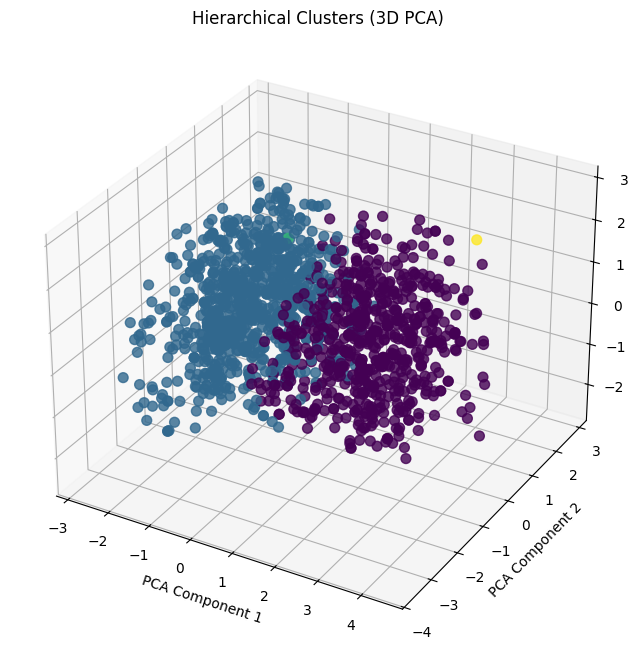

In [54]:
# 3D cluster visualisation

import matplotlib.pyplot as plt
# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)

def plot_3d_clusters(labels, method_name):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
               c=labels, cmap='viridis', s=50, alpha=0.8)
    ax.set_title(f'{method_name.capitalize()} Clusters (3D PCA)')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.show()


# Plot 3D visualizations for each clustering method
plot_3d_clusters(kmeans_labels, 'K-Means')
plot_3d_clusters(dbscan_labels, 'DBSCAN')
plot_3d_clusters(agg_labels, 'Hierarchical')

Here also DBSCAN shows better clustering but the silhouette score of DBSCAN was not performing well. So let's validate this further.

## Validate further with Davies-Bouldin and Calinski-Harabasz

In [55]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

def evaluate_clusters(X, labels, method_name):
    print(f"\nEvaluation Metrics for {method_name}:")
    print("Silhouette Score:", silhouette_score(X, labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(X, labels))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(X, labels))

evaluate_clusters(scaled_df, kmeans_labels, "KMeans Tuned")
evaluate_clusters(scaled_df, dbscan_labels, "DBSCAN Tuned")
evaluate_clusters(scaled_df, agg_labels, "Hierarchical Tuned")



Evaluation Metrics for KMeans Tuned:
Silhouette Score: 0.19479688025159242
Davies-Bouldin Index: 1.826601016994821
Calinski-Harabasz Score: 415.43036906681067

Evaluation Metrics for DBSCAN Tuned:
Silhouette Score: 0.1499552400566017
Davies-Bouldin Index: 4.498273025694847
Calinski-Harabasz Score: 111.9284940422531

Evaluation Metrics for Hierarchical Tuned:
Silhouette Score: 0.18413369524219017
Davies-Bouldin Index: 1.117354243383724
Calinski-Harabasz Score: 180.06705636885843


- Silhouette Score of K-means is the best one, but the differences are not much with the rest.
- Calinski-Harabasz score of K-means is also good.
- Calinski-Harabasz score of DBSCAN is not good.The Davies-Bouldin is also quite high, indicating poor performance, so the visualization was not enough. We also had seen in the cluster characterization that DBSCAN was not able to distinguish between clusters.
- Calinski-Harabasz score of Hierarchical tuning is moderate and still acceptable, but it is not as good as K-means.
- Clearly, the Davies-Bouldin of Hierarchical tuned is better because of the lowest value. Cluster characterization also suggested the same as it was able to uncover diverse behaviour.

In overall K-means is better because of balance score values but hierarchical can also be considered.
So K-means or hierarchical is suitable rather than going with DBSCAN.

## Validate the clusters using PERMANOVA to evaluate separation of the groups.

In [57]:
# Validate the clusters using PERMANOVA

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd

# Fit the model Income using the original DataFrame 'df'
print("Income PREMANOVA:")
model = ols('Income ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Fit the model Expenses using the original DataFrame 'df'
print("Total Expense PREMANOVA:")
model = ols('Expenses ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Fit the model TotalNumPurchases using the original DataFrame 'df'
print("Total TotalNumPurchases PREMANOVA:")
model = ols('Purchases ~ C(kmeans_tuned_Cluster)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

Income PREMANOVA:
                               sum_sq      df            F         PR(>F)
C(kmeans_tuned_Cluster)  3.334069e+11     2.0  1105.702947  1.669037e-299
Residual                 2.345934e+11  1556.0          NaN            NaN
Total Expense PREMANOVA:
                               sum_sq      df           F  PR(>F)
C(kmeans_tuned_Cluster)  2.855570e+08     2.0  2369.07903     0.0
Residual                 9.377624e+07  1556.0         NaN     NaN
Total TotalNumPurchases PREMANOVA:
                               sum_sq      df            F  PR(>F)
C(kmeans_tuned_Cluster)  56814.381475     2.0  1400.921045     0.0
Residual                 31551.805824  1556.0          NaN     NaN


- Income :
  - The F-statistic is large, meaning clusters explain much more variance than random noise.

  - p-value is 0, meaning it rejects the null hypothesis. Income differs significantly across clusters.

- Expenses :
  - The F-statistic is even larger, meaning clusters explain much more variance than random noise.

  - p-value is 0, meaning it rejects the null hypothesis.

  - Even stronger result than income. Expenses vary a lot across clusters.

- Purchasing :
  - Again, very strong, Purchasing behavior is also significantly different between clusters.

## Conclusion

The analysis revealed that K-Means produced the most balanced and interpretable clusters, supported by strong evaluation scores and significant group differences in income, expenses, and purchases.  

Hierarchical clustering also showed potential, uncovering diverse customer behavior with competitive performance.  
DBSCAN, while effective at detecting outliers, struggled to form well-separated clusters in this dataset.


Overall, K-Means or Hierarchical clustering are suitable approaches for actionable customer segmentation in this marketing context.
